In [25]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model

In [8]:
#Get the Dataset
df=pd.read_csv('MSFT.csv',na_values=['null'],parse_dates=True,infer_datetime_format=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [10]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (9083, 7)
Null Value Present:  False


<AxesSubplot: >

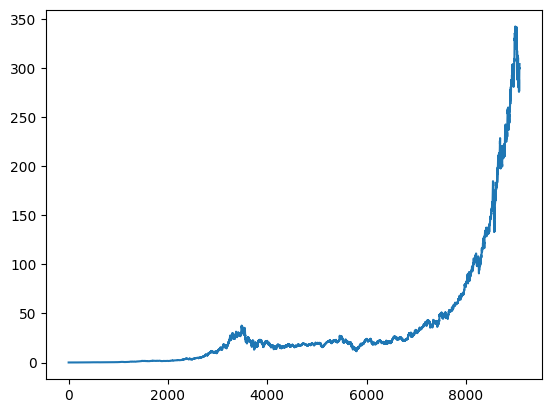

In [12]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model. This figure indicates the stock’s closing price on that particular day of stock market trading.

In [14]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

## Feature Scaling

In [15]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.000000,0.000027,0.000000,1.000000
1,0.000025,0.000030,0.000025,0.297096
2,0.000035,0.000032,0.000036,0.127119
3,0.000040,0.000032,0.000030,0.063588
4,0.000033,0.000025,0.000025,0.044285


In [16]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

The sci-kit-learn library’s TimeSeriesSplit class will be used for this.The advantage of utilizing this Time Series split is that the split time series data samples are examined at regular time intervals.

In [17]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

As the LSTM needs that the data to be provided in the 3D form, we first transform the training and test data to NumPy arrays and then restructure them to match the format (Number of Samples, 1, Number of Features). 

## Building the LSTM Model for Stock Market Prediction

In [26]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Finally, we arrive at the point when we construct the LSTM Model. In this step, we’ll build a Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

We compile the model using Adam Optimizer and the Mean Squared Error as the loss function. For an LSTM model, this is the most preferred combination. 

In [20]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1033/1033 [==============================] - 5s 2ms/step - loss: 26.1632
Epoch 2/100
1033/1033 [==============================] - 2s 2ms/step - loss: 192.2296
Epoch 3/100
1033/1033 [==============================] - 2s 2ms/step - loss: 92.6155
Epoch 4/100
1033/1033 [==============================] - 2s 2ms/step - loss: 41.5010
Epoch 5/100
1033/1033 [==============================] - 2s 2ms/step - loss: 14.9276
Epoch 6/100
1033/1033 [==============================] - 2s 2ms/step - loss: 4.6514
Epoch 7/100
1033/1033 [==============================] - 2s 2ms/step - loss: 1.9796
Epoch 8/100
1033/1033 [==============================] - 2s 2ms/step - loss: 1.2281
Epoch 9/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.8897
Epoch 10/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.7107
Epoch 11/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.6236
Epoch 12/100
1033/1033 [==============================] - 2s 2ms/ste

## LSTM Prediction

In [21]:
y_pred= lstm.predict(X_test)

26/26 [==============================] - 0s 1ms/step


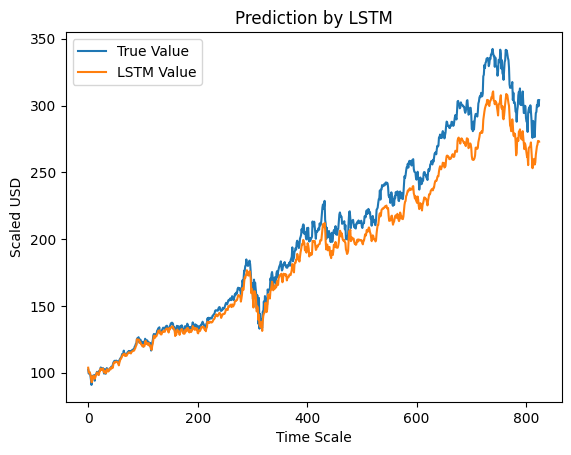

In [22]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

The graph above demonstrates that the extremely basic single LSTM network model created above detects some patterns. We may get a more accurate depiction of every specific company’s stock value by fine-tuning many parameters and adding more LSTM layers to the model.